# Udacity Sensor Fusion Nanodegree Program

This notebook contains algorithm implementation from Udacity Sensor Fusion Nanodegree. In the program, all the codes are implemented in C++, this notebook translates those codes into Python

## Lesson 1: Lidar Obstacle Detection

### Import libraries

In [7]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets

### Create datasets

In [8]:
n_samples = 1000
n_outliers = 50

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [ ]:
##

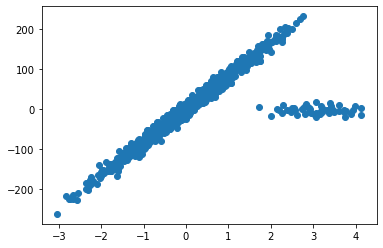

In [9]:
plt.plot(X, y, 'o')